# **APPENDIX: TEAM 12A PROJECT CODE**

## Importing libraries and Connecting to Google Drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')
# Increase the default max number of columns displayed
from google.colab.data_table import DataTable
DataTable.max_columns = 100

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the Clustering Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MSBA Team 12A/BANA 200A (Foundations of Business Analytics )/Clustering Data.csv')

data.head()

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## Data Pre-Processing for Clustering

In [ ]:
# checking for missing values
missing_values = data.isnull().sum()
missing_values

,0
uid,0
PNRLocatorID,0
avg_amt,0
round_trip,0
group_size,0
...,...
UflyMemberStatus_Standard,0
seasonality_Q1,0
seasonality_Q2,0
seasonality_Q3,0


In [ ]:
# Preserving the original data
clustering_data = data.copy()

# preparing for clustering
clustering_data.drop(columns = ['PNRLocatorID', 'uid'], inplace=True)
clustering_data.head()

,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,BookingChannel_SCA_Website_Booking,BookingChannel_SY_Vacation,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,0.019524,0,0.000,0,0.029703,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.081774,1,0.000,0,0.039604,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0.026650,0,0.125,1,0.069307,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0.026650,0,0.125,1,0.069307,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0.000000,1,0.000,0,0.035361,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Clustering

Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10


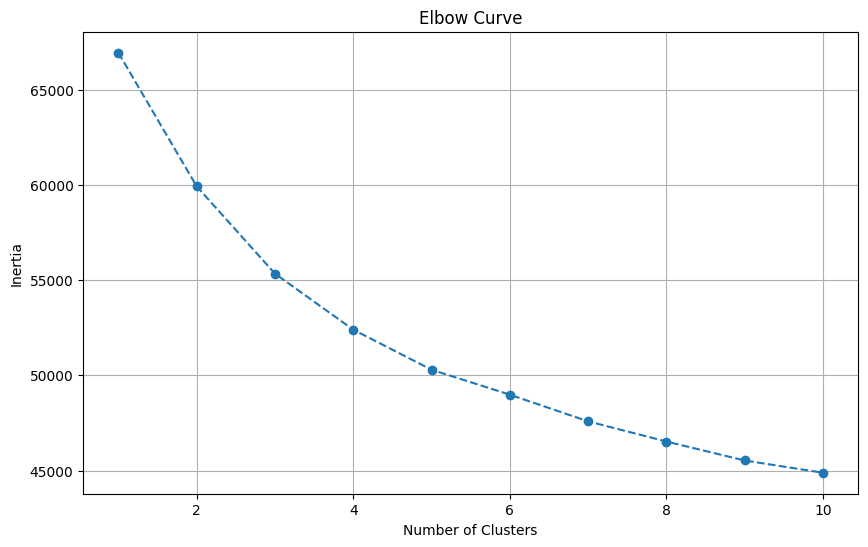

In [ ]:
# Finding the optimal K (Given to us as 5)

inertia = []                  # sum of squared distances between each data point and its closest cluster centroid (wcss)
cluster_range = range(1,11)


for cluster_num in cluster_range:

    print(f'Iteration Number: {cluster_num}')

    kmeans = KMeans(n_clusters=cluster_num, n_init=10)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# applying the kmeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_data)

####### For analysis, do NOT assign the labels to the transformed data!
data['Cluster'] = kmeans.labels_

data.head(10000)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4,Cluster
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,1,0,0,0,1,4
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,1,0,0,1,0,4
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,465241484D44696420493F7C2067657420746869732072...,OVDEVE,0.042032,0,0.125,1,0.036775,0,0,0,...,0,0,0,0,1,0,0,1,0,4
9996,5649434B45525944696420493F7C206765742074686973...,OVDVCT,0.049705,0,0.000,0,0.028289,0,1,0,...,0,0,0,1,0,0,0,1,0,3
9997,535445504B4144696420493F7C20676574207468697320...,OVGARJ,0.012305,1,0.000,0,0.019802,0,1,0,...,0,0,0,1,0,0,0,1,0,0
9998,4B4F53544B4F44696420493F7C20676574207468697320...,OVGBHE,0.067609,1,0.125,1,0.125884,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# cluster counts
data['Cluster'].value_counts().sort_index()

,count
Cluster,
0,3843
1,2353
2,4127
3,2436
4,2385


## Merging the Cluster and Customer Data

In [ ]:
# loading the customer data
customer_data = pd.read_csv('/content/drive/MyDrive/MSBA Team 12A/BANA 200A (Foundations of Business Analytics )/sample_data_transformed.csv')
customer_data.head()

<ipython-input-9-e1f0414e29a9>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('/content/drive/MyDrive/MSBA Team 12A/BANA 200A (Foundations of Business Analytics )/sample_data_transformed.csv')


,Unnamed: 0,PNRLocatorID,PaxName,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,EncryptedName,...,uid,age_group,true_origins,final_destination,round_trip,group_size,group,seasonality,days_pre_booked,true_destination
0,1,AADMLF,PETEJO,3.377490e+12,1,MSP,DFW,9/15/14,10/6/14,504554455244696420493F7C2067657420746869732072...,...,504554455244696420493F7C2067657420746869732072...,55+,MSP,DFW,0,1,0,Q4,21,DFW
1,2,AAFBOM,FIXSMO,3.372110e+12,2,JFK,MSP,7/22/14,8/19/14,46495853454E44696420493F7C20676574207468697320...,...,46495853454E44696420493F7C20676574207468697320...,35-54,MSP,MSP,1,1,0,Q3,28,JFK
2,3,AAFBOM,FIXSMO,3.372110e+12,1,MSP,JFK,7/22/14,8/14/14,46495853454E44696420493F7C20676574207468697320...,...,46495853454E44696420493F7C20676574207468697320...,35-54,MSP,MSP,1,1,0,Q3,23,JFK
3,4,AAFILI,SCUTKA,3.372110e+12,2,MSP,SEA,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,534355545444696420493F7C2067657420746869732072...,25-34,LAN,SEA,0,2,1,Q1,49,MSP
4,5,AAFILI,SCUTKA,3.372110e+12,1,LAN,MSP,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,534355545444696420493F7C2067657420746869732072...,25-34,LAN,SEA,0,2,1,Q1,49,MSP


In [ ]:
# cleaning the customer data
customer_data.drop(columns = ['Unnamed: 0'], inplace=True)

# merging the two dataframes
final_df = customer_data.merge(data[['uid', 'Cluster']], on='uid', how='left')
final_df.head()

,PNRLocatorID,PaxName,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,EncryptedName,GenderCode,...,age_group,true_origins,final_destination,round_trip,group_size,group,seasonality,days_pre_booked,true_destination,Cluster
0,AADMLF,PETEJO,3.377490e+12,1,MSP,DFW,9/15/14,10/6/14,504554455244696420493F7C2067657420746869732072...,M,...,55+,MSP,DFW,0,1,0,Q4,21,DFW,4
1,AAFBOM,FIXSMO,3.372110e+12,2,JFK,MSP,7/22/14,8/19/14,46495853454E44696420493F7C20676574207468697320...,F,...,35-54,MSP,MSP,1,1,0,Q3,28,JFK,4
2,AAFBOM,FIXSMO,3.372110e+12,1,MSP,JFK,7/22/14,8/14/14,46495853454E44696420493F7C20676574207468697320...,F,...,35-54,MSP,MSP,1,1,0,Q3,23,JFK,4
3,AAFILI,SCUTKA,3.372110e+12,2,MSP,SEA,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,F,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,1
4,AAFILI,SCUTKA,3.372110e+12,1,LAN,MSP,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,F,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,1


## Data Visualizations for Segment Analysis

### Cluster Distribution

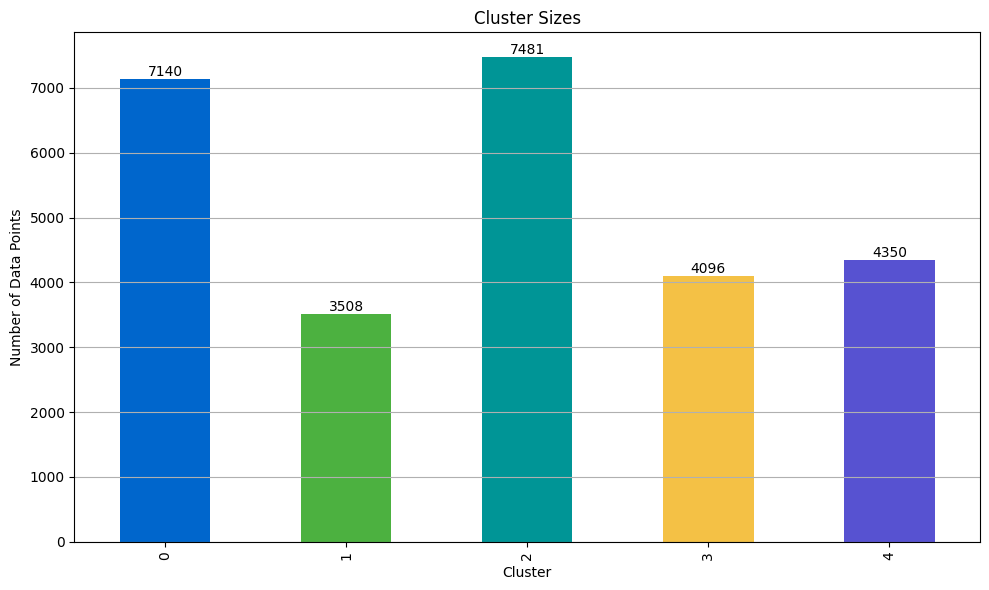

In [ ]:
colors = ['#06C', '#4CB140', '#009596', '#F4C145', '#5752D1']

cluster_sizes = final_df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# for cluster in range(len(cluster_sizes)):
#     plt.bar(cluster, cluster_sizes[cluster], color=colors[cluster])

ax = cluster_sizes.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(ticks=range(len(cluster_sizes)))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Customer Age by Segments

<ipython-input-12-a12d7373e189>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=final_df, palette='viridis')


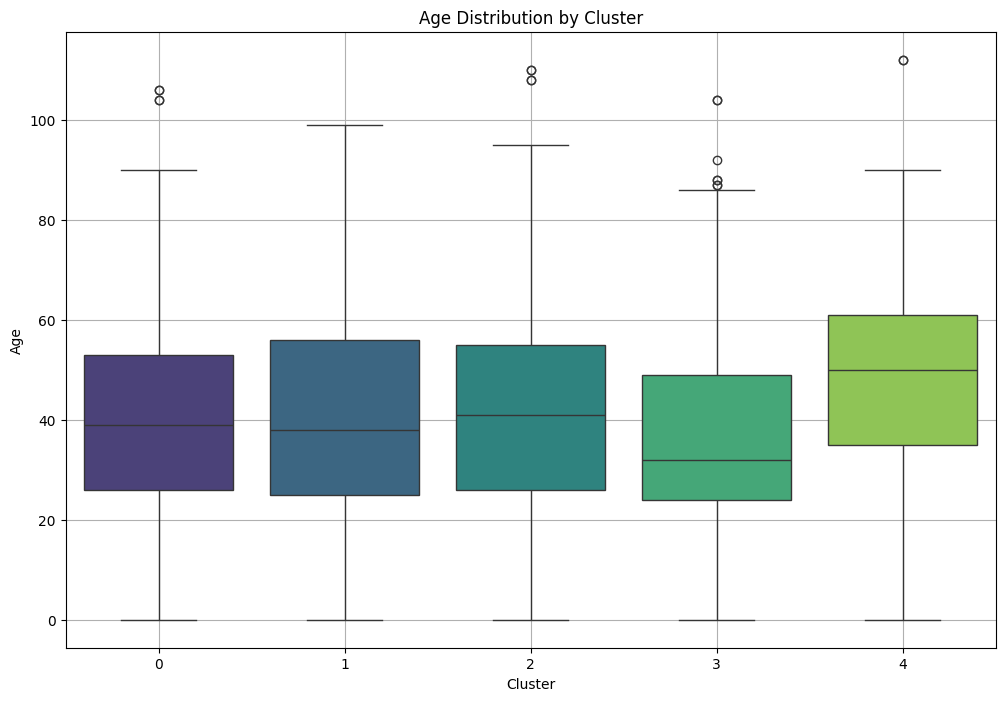

In [ ]:
# Age boxplot

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Age', data=final_df, palette='viridis')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.grid(True)
plt.show()

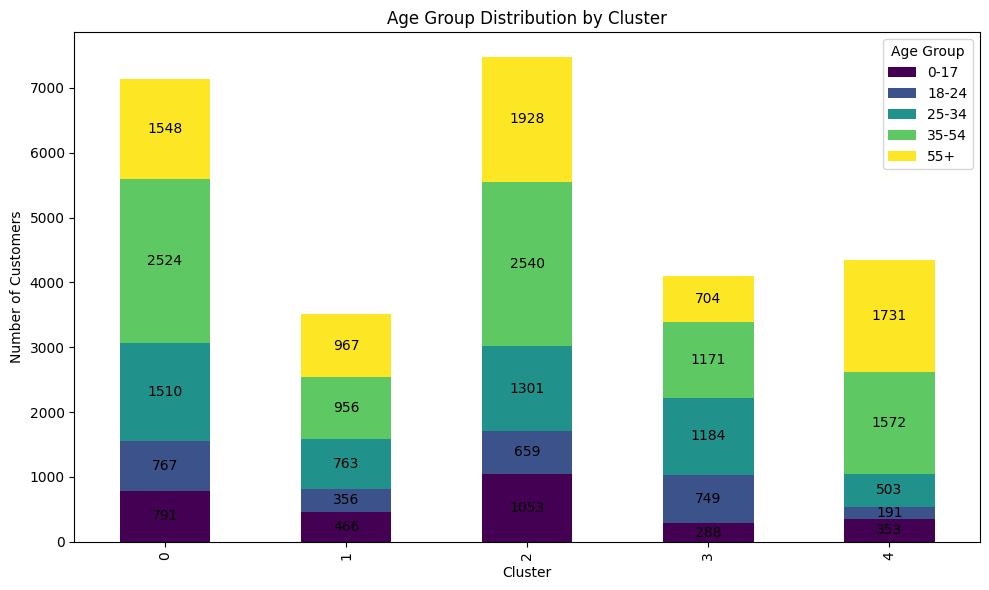

In [ ]:
# Age Group Stacked bar chart

age_distribution = final_df.groupby(['Cluster', 'age_group']).size().unstack().fillna(0)

# Plotting the stacked bar chart
ax = age_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding labels to each segment of the stacked bar chart
for c in ax.containers:
    labels = [f'{int(v)}' if v > 0 else '' for v in c.datavalues]  # Only add label if value > 0
    ax.bar_label(c, labels=labels, label_type='center')

# Plot
# age_distribution.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Age Group Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### Customer Gender by Segment

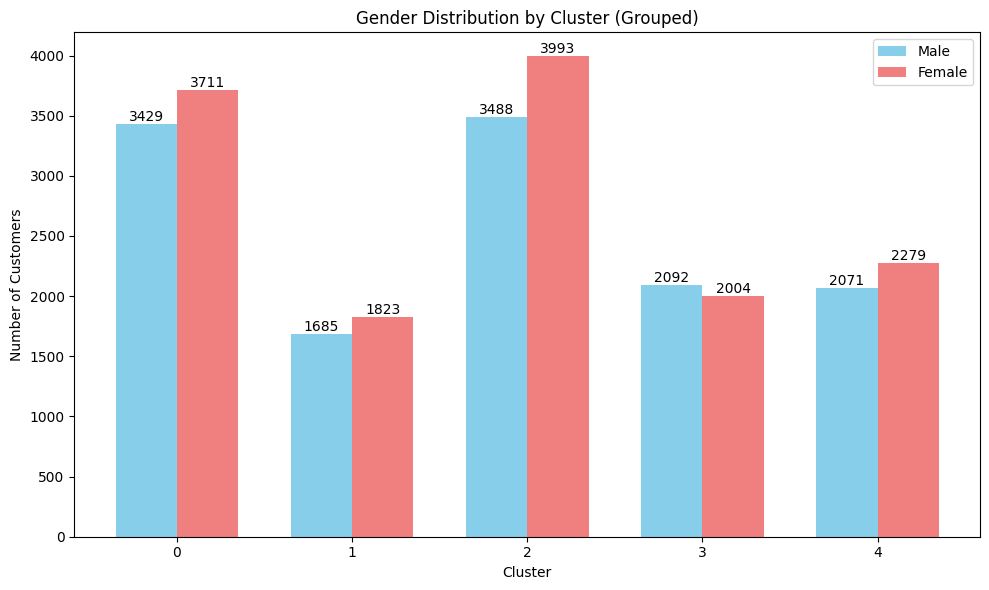

In [ ]:
# Grouping data by clusters and gender
gender_distribution = final_df.groupby(['Cluster', 'GenderCode']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

# Setting bar width and positions for grouped bar chart
bar_width = 0.35
index = np.arange(len(gender_distribution.index))

# bars for Male and Female
bars1 = ax.bar(index, gender_distribution['M'], bar_width, label='Male', color = 'skyblue')
bars2 = ax.bar(index + bar_width, gender_distribution['F'], bar_width, label='Female', color = 'lightcoral')

# Adding number labels on the bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of Customers')
ax.set_title('Gender Distribution by Cluster (Grouped)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(gender_distribution.index)
ax.legend()
plt.tight_layout()
plt.show()

### Customer Booking Channel Preferrences by Segment

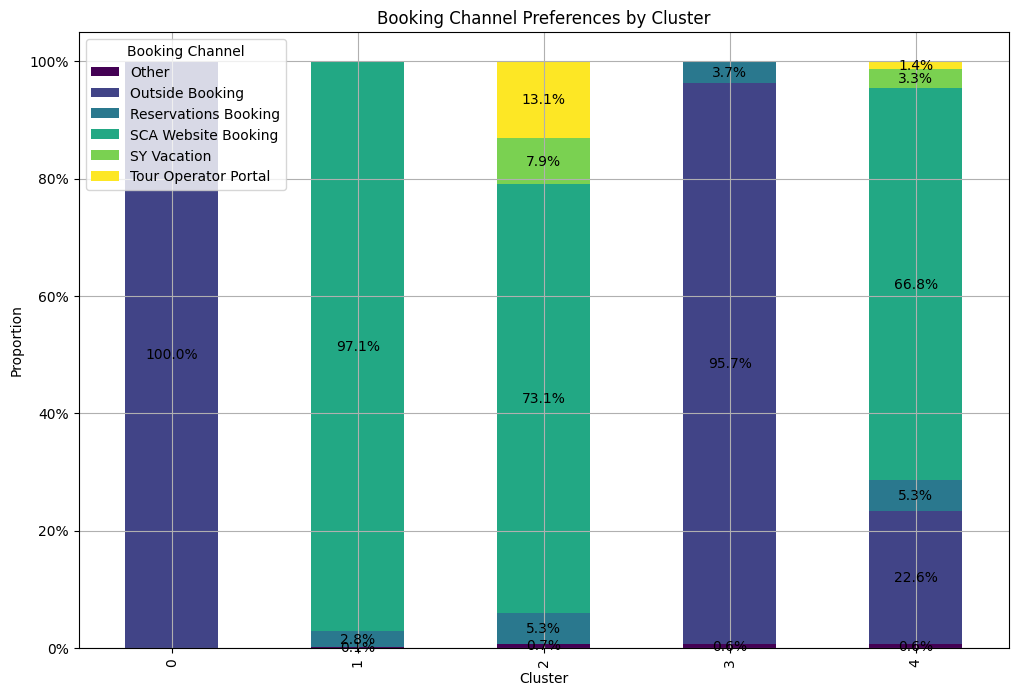

In [ ]:
import matplotlib.ticker as mtick

# creating stacked and percentage data
booking_channel_distribution = final_df.groupby(['Cluster', 'BookingChannel']).size().unstack().fillna(0)
booking_channel_distribution_percentage = booking_channel_distribution.div(booking_channel_distribution.sum(axis=1), axis=0)

ax = booking_channel_distribution_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# adding percent labels to the bars
for i, cluster in enumerate(booking_channel_distribution_percentage.index):
    cumulative = 0
    for j, booking_channel in enumerate(booking_channel_distribution_percentage.columns):
        value = booking_channel_distribution_percentage.iloc[i, j]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1%}', ha='center', va='center', color='black', fontsize=10)

# plot
plt.title('Booking Channel Preferences by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Booking Channel')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(True)
plt.show()

### Average Total Amount Spent by Segment

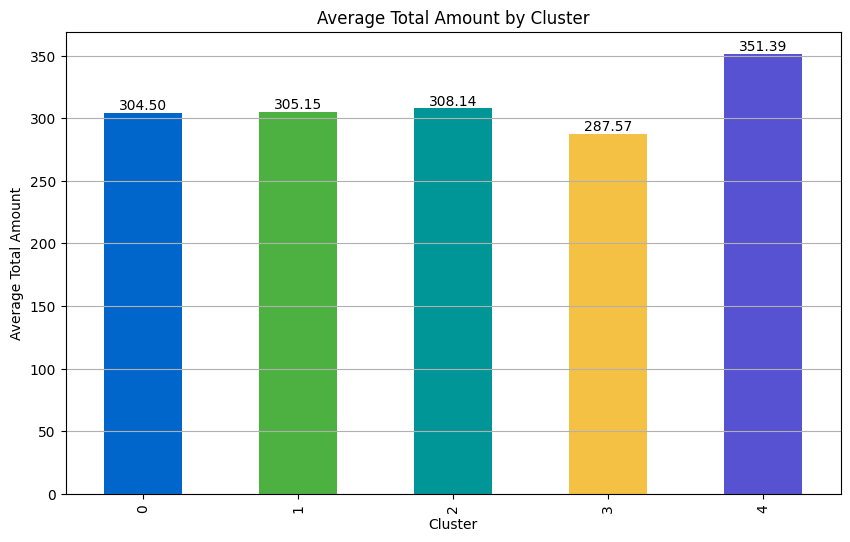

In [ ]:
# preparing the data for plot
avg_amt_by_cluster = final_df.groupby('Cluster')['TotalDocAmt'].mean()
plt.figure(figsize=(10, 6))

ax = avg_amt_by_cluster.plot(kind='bar', color=colors)

# Adding number labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Average Total Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Amount')
plt.grid(axis='y')
plt.show()

### Average Days Pre-Booked by Segment

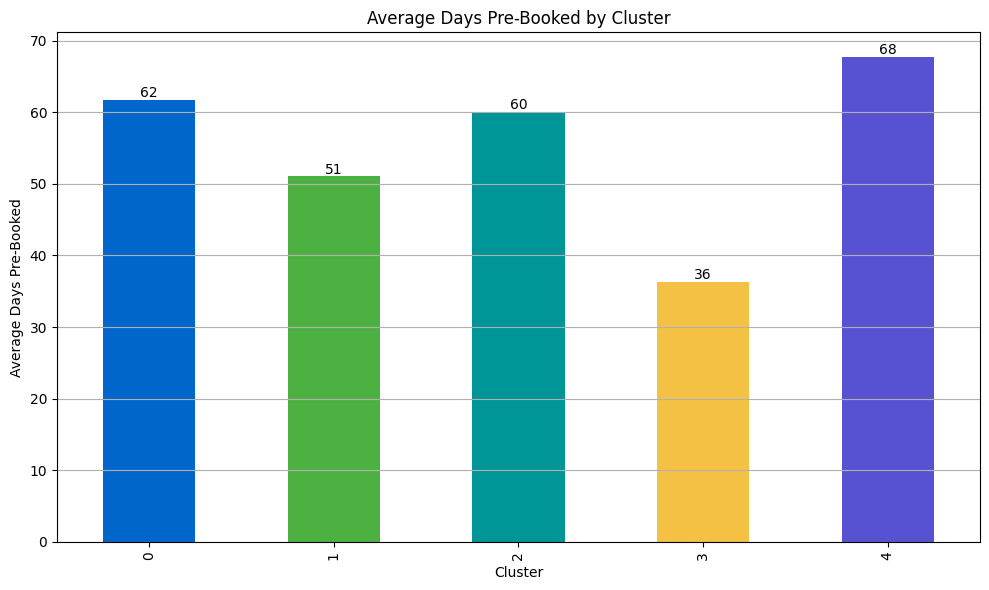

In [ ]:
# Grouping data by clusters to calculate average days pre-booked
days_pre_booked_avg = final_df.groupby('Cluster')['days_pre_booked'].mean()

plt.figure(figsize=(10,6))
ax = days_pre_booked_avg.plot(kind='bar', color=colors)

# Adding number labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# plot
plt.title('Average Days Pre-Booked by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Days Pre-Booked')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Travel Class and Memeber Status by Segment

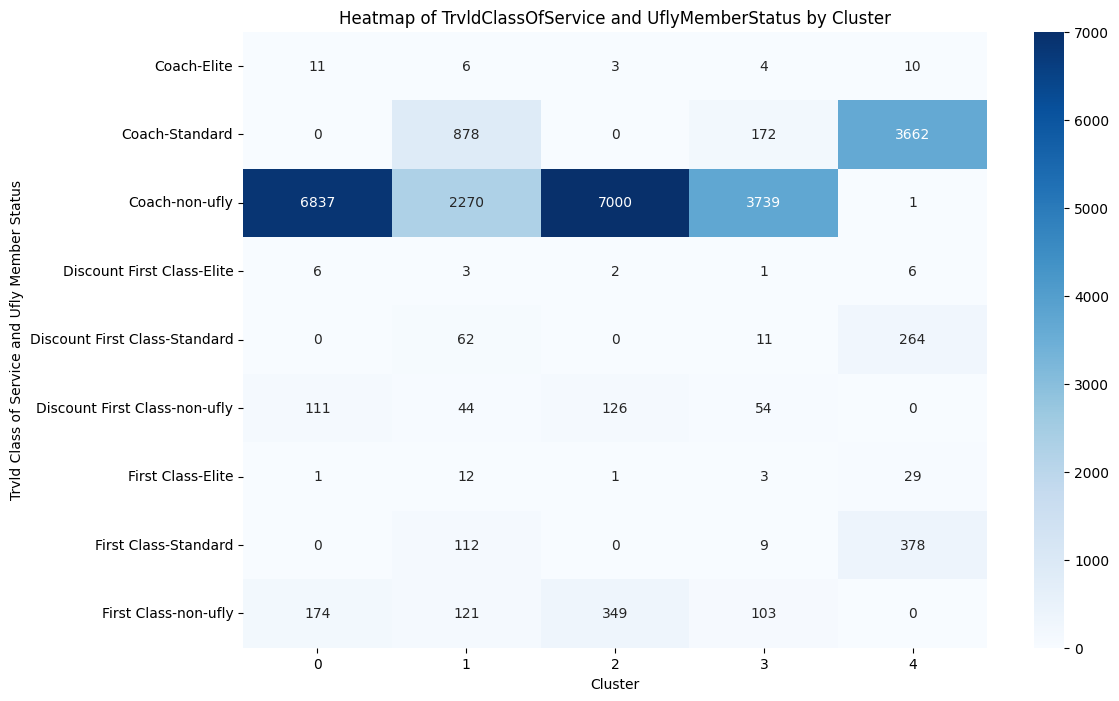

In [ ]:
# setting up the data for the heatmap
crosstab_data = pd.crosstab([final_df['TrvldClassOfService'], final_df['UflyMemberStatus']], final_df['Cluster'])

plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(crosstab_data, annot=True, fmt="d", cmap="Blues")

# Customize the plot
plt.title('Heatmap of TrvldClassOfService and UflyMemberStatus by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Trvld Class of Service and Ufly Member Status')

plt.show()